In [1]:
import pandas as pd
dataset_name = 'en'

Job Postings数据统计分析

In [2]:
job = pd.read_csv(f'../data/{dataset_name}/job_description.csv', sep='\t')
for col in job.columns:
    print(f"The num of {col} is", job[col].nunique())

The num of title is 72521
The num of description is 107827


O*Net数据统计分析

In [3]:
task_occupation = pd.read_csv(f'../data/{dataset_name}/task_occupation.csv', sep='\t')
for col in task_occupation.columns:
    print(f"The num of {col} is", task_occupation[col].nunique())

The num of occupation is 1016
The num of task is 17536


抽取task之后的数据分布

In [4]:
job_task = pd.read_csv(f'../step2-task_map_occupation/outputs/{dataset_name}/job_task.csv', sep='\t')
for col in job_task.columns:
    print(f"The num of {col} is", job_task[col].nunique())

The num of title is 53920
The num of description is 76226
The num of task is 261971


按照长度10-50内过滤task后的数据分布

In [5]:
title_task = pd.read_csv(f'../step2-task_map_occupation/outputs/{dataset_name}/title_task.csv', sep='\t')
for col in title_task.columns:
    print(f"The num of {col} is", title_task[col].nunique())

The num of title is 34014
The num of description is 103747
The num of length is 39


job title和occupation匹配的结果

In [6]:
title_occupation = pd.read_parquet(f'../step4-title_occupation/results/{dataset_name}/seed0.parquet')
for col in title_occupation.columns:
    print(f"The num of {col} is", title_occupation[col].nunique())

The num of title is 70737
The num of occupation is 896


Task分类的结果

In [7]:
final_job_task = pd.read_csv(f'../step5-task_map_task/results/{dataset_name}/seed0.csv', sep='\t')
for col in final_job_task.columns:
    print(f"The num of {col} is", final_job_task[col].nunique())

The num of job title is 32507
The num of job description is 97755
The num of occupation is 774
The num of task is 6728
The num of similarity is 32490


In [8]:
import os
if not os.path.exists(f'data/{dataset_name}'):
    os.makedirs(f'data/{dataset_name}')
final_job_task.to_csv(f'data/{dataset_name}/job_task.csv', index=None, sep='\t')

In [9]:
final_job_task_group = final_job_task.groupby('task').agg(list)
final_job_task_group['occupation'] = final_job_task_group['occupation'].apply(set).apply(list)
final_job_task_group['job num'] = final_job_task_group['job description'].apply(len)
final_job_task_group = final_job_task_group.sort_values('job num', ascending=False)
final_job_task_group

,job title,job description,occupation,similarity,job num
task,,,,,
"Develop or update project plans including information such as objectives, technologies, schedules, funding, and staffing.","[Business Continuity Analyst, Project Manageme...",[Assist in the coordination with IT and networ...,"[Computer Network Architects, Human Resources ...","[0.905667731, 0.898307254, 0.898080025, 0.8980...",1353
"Plan and direct staffing, training, and performance evaluations to develop and control sales and service programs.","[Public Markets Business Analyst, Quality Cont...","[Develop, execute, and document user test plan...","[Computer Network Architects, Aerospace Engine...","[0.9005516280000002, 0.89933253, 0.898080025, ...",1153
"Establish or implement departmental policies, goals, objectives, or procedures in conjunction with board members, organization officials, or staff members.","[Organizational Development Specialist, System...",[Develop comprehensive strategies to manage or...,"[Computer Network Architects, First-Line Super...","[0.906616811, 0.901060061, 0.900503216, 0.8971...",1119
Communicate with key stakeholders to determine project requirements and objectives.,"[Process Improvement Analyst, Supply Chain Man...",[Description \n\nSr. Process Improvement type ...,"[Computer Network Architects, Human Resources ...","[0.903960851, 0.900313431, 0.899434562, 0.8980...",784
"Prepare and submit budget estimates, progress reports, or cost tracking reports.","[Financial Data Analyst, Production Planning A...",[Develop and maintain forecasting databases/to...,"[Computer Network Architects, First-Line Super...","[0.901418308, 0.8993200869999999, 0.8975870239...",747
...,...,...,...,...,...
Adapt the quantity of ingredients to match the amount of items to be baked.,[Cook],"[Complete daily prep list, maintain station th...",[Bakers],[0.804752212],1
Write prescriptions for antibiotics or other medications.,[Quality Manager],"[Develop key internal relationships, with the ...",[Quality Control Analysts],[0.8608092559999999],1
Manage business aspects such as employing or supervising staff or handling paperwork or insurance claims.,[Implementation Senior Project Manager],"[Manage full SaaS implementation, from initiat...",[Project Management Specialists],[0.8424080120000002],1


In [16]:
if not os.path.exists(f"outputs/{dataset_name}"):
    os.makedirs(f"outputs/{dataset_name}")
for col in final_job_task_group.columns:
    if 'num' not in col:
        final_job_task_group[col] = final_job_task_group[col].apply(lambda x: list(set(x)))
final_job_task_group.to_excel(f"outputs/{dataset_name}/{dataset_name}_job_task.xlsx")

In [10]:
final_job_task_group[final_job_task_group['job num']>40]

,job title,job description,occupation,similarity,job num
task,,,,,
"Develop or update project plans including information such as objectives, technologies, schedules, funding, and staffing.","[Business Continuity Analyst, Project Manageme...",[Assist in the coordination with IT and networ...,"[Computer Network Architects, Human Resources ...","[0.905667731, 0.898307254, 0.898080025, 0.8980...",1353
"Plan and direct staffing, training, and performance evaluations to develop and control sales and service programs.","[Public Markets Business Analyst, Quality Cont...","[Develop, execute, and document user test plan...","[Computer Network Architects, Aerospace Engine...","[0.9005516280000002, 0.89933253, 0.898080025, ...",1153
"Establish or implement departmental policies, goals, objectives, or procedures in conjunction with board members, organization officials, or staff members.","[Organizational Development Specialist, System...",[Develop comprehensive strategies to manage or...,"[Computer Network Architects, First-Line Super...","[0.906616811, 0.901060061, 0.900503216, 0.8971...",1119
Communicate with key stakeholders to determine project requirements and objectives.,"[Process Improvement Analyst, Supply Chain Man...",[Description \n\nSr. Process Improvement type ...,"[Computer Network Architects, Human Resources ...","[0.903960851, 0.900313431, 0.899434562, 0.8980...",784
"Prepare and submit budget estimates, progress reports, or cost tracking reports.","[Financial Data Analyst, Production Planning A...",[Develop and maintain forecasting databases/to...,"[Computer Network Architects, First-Line Super...","[0.901418308, 0.8993200869999999, 0.8975870239...",747
...,...,...,...,...,...
"Consult with medical, business, and community groups to discuss service problems, respond to community needs, enhance public relations, coordinate activities and plans, and promote health programs.","[Marketing Communications Manager, Marketing C...",[Managing the development and execution of the...,"[Command and Control Center Specialists, Wind ...","[0.8832764550000001, 0.8832764550000001, 0.878...",41
Keep records of maintenance and repair work.,"[Customer Success Manager, Mechanical Service ...","[Manage the details of each account, including...","[Sales Managers, Wind Energy Operations Manage...","[0.889644645, 0.884328808, 0.8750674540000001,...",41
Develop databases that support Web applications and Web sites.,"[Marketing Business Development Manager, Corpo...",[Develop and maintain inventory of branded mer...,"[Health Informatics Specialists, Computer Scie...","[0.8859837100000002, 0.879716098, 0.878300011,...",41


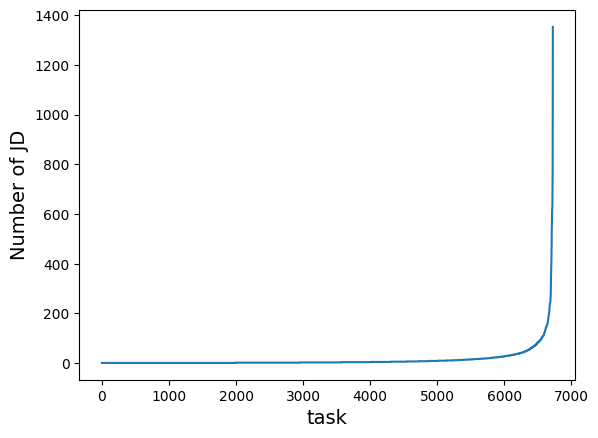

In [11]:
import matplotlib.pyplot as plt
num_list =  final_job_task_group['job num']
num_list = sorted(num_list)
plt.rcParams['font.size'] = 10
plt.plot(num_list)
plt.xlabel('task', fontsize=14)
plt.ylabel('Number of JD', fontsize=14)
plt.show()